# Optimization oil pipeline route, taking into account contamination of the territory with radionuclides and minimizing exposure to radiation for workers


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot as gpl
from matplotlib import pyplot as plt
from shapely.geometry import Point, LineString
import contextily as ctx
pd.options.mode.chained_assignment = None

In [5]:
data = pd.read_csv("Data2.csv")
# insert coordinates detween known points
data['B'].interpolate(method='linear', inplace=True, limit=100, )
data['L'].interpolate(method='linear', inplace=True, limit=100, )
# creating segments of rote from one point to another
data['B_b'] = None
data['B_b'][1:] = data['B'][:-1]
data['B_a'] = None
data['B_a'][:-1] = data['B'][1:]
data['L_b'] = None
data['L_b'][1:] = data['L'][:-1]
data['L_a'] = None
data['L_a'][:-1] = data['L'][1:]
data = data[1:-1]
geometry = [LineString([(xy[0], xy[1]), (xy[2], xy[3])]) for xy in zip(data.L_b, data.B_b, data.L_a, data.B_a)]

data = gpd.GeoDataFrame(data, crs={'init': 'epsg:4326'}, geometry=geometry) # epsg:3857  4326
data.head()

Distance  Point          B          L   H  Density_Cs_min  Density_Cs_max  \
1      0.1    NaN  52.318350  30.886059 NaN               0              37   
2      0.2    NaN  52.317549  30.884992 NaN               0              37   
3      0.3    NaN  52.316749  30.883924 NaN               0              37   
4      0.4    2.0  52.315949  30.882857 NaN               0              37   
5      0.5    NaN  52.315158  30.881795 NaN               0              37   

   Unnamed: 7 Density_Sr_min  Density_Sr_max  ...  internal (inhal.) 2040 h.1  \
1         NaN              0            5.55  ...                       0.026   
2         NaN              0            5.55  ...                       0.026   
3         NaN              0            5.55  ...                       0.026   
4         NaN              0            5.55  ...                       0.026   
5         NaN              0            5.55  ...                       0.026   

   internal (inhal.) 2040 h.2  Unnamed: 38 Unnamed: 39  \
1                       0.067      52.3175     30.8850   
2                       0.067      52.3167     30.8839   
3                       0.067      52.3159     30.8829   
4                       0.067      52.3152     30.8818   
5                       0.067      52.3144     30.8807   

                  Unnamed: 40      B_b      B_a      L_b      L_a  \
1       52.3175495,30.8849915  52.3192  52.3175  30.8871   30.885   
2     52.31674925,30.88392425  52.3183  52.3167  30.8861  30.8839   
3  52.3159489999999,30.882857  52.3175  52.3159   30.885  30.8829   
4  52.3151584999999,30.881795  52.3167  52.3152  30.8839  30.8818   
5         52.314368,30.880733  52.3159  52.3144  30.8829  30.8807   

                                            geometry  
1  LINESTRING (30.88713 52.31915, 30.88499 52.31755)  
2  LINESTRING (30.88606 52.31835, 30.88392 52.31675)  
3  LINESTRING (30.88499 52.31755, 30.88286 52.31595)  
4  LINESTRING (30.88392 52.31675, 30.88180 52.31516)  
5  LINESTRING (30.88286 52.31595, 30.88073 52.31437)  

[5 rows x 46 columns]

In [6]:
data.columns

Index(['Distance', 'Point', 'B', 'L', 'H', 'Density_Cs_min', 'Density_Cs_max',
       'Unnamed: 7', 'Density_Sr_min', 'Density_Sr_max', 'log-normal',
       'SA_Cs-137', 'SA_Sr-90', 'Soil_Type', 'Soil_Subtype',
       'Soil_Granulometry', 'Plant_Formation', 'Plant_Type', 'Age',
       'Wood_Stock, m3/ha', 'Wood_ATF_Cs-137', 'Wood_ATF_Sr-90', 'Leaf_Cs-137',
       'Leaf_Sr-90', 'SA_Cs_Wood', 'Leaf', 'Dose_external',
       'Dose_internal (inhal.)', '3.90E-08', '1.60E-07', '1.00E-08', '1.41',
       'internal (inhal.)', 'internal (inhal.).1', 'internal (inhal.).2',
       'internal (inhal.) 2040 h', 'internal (inhal.) 2040 h.1',
       'internal (inhal.) 2040 h.2', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'B_b', 'B_a', 'L_b', 'L_a', 'geometry'],
      dtype='object')

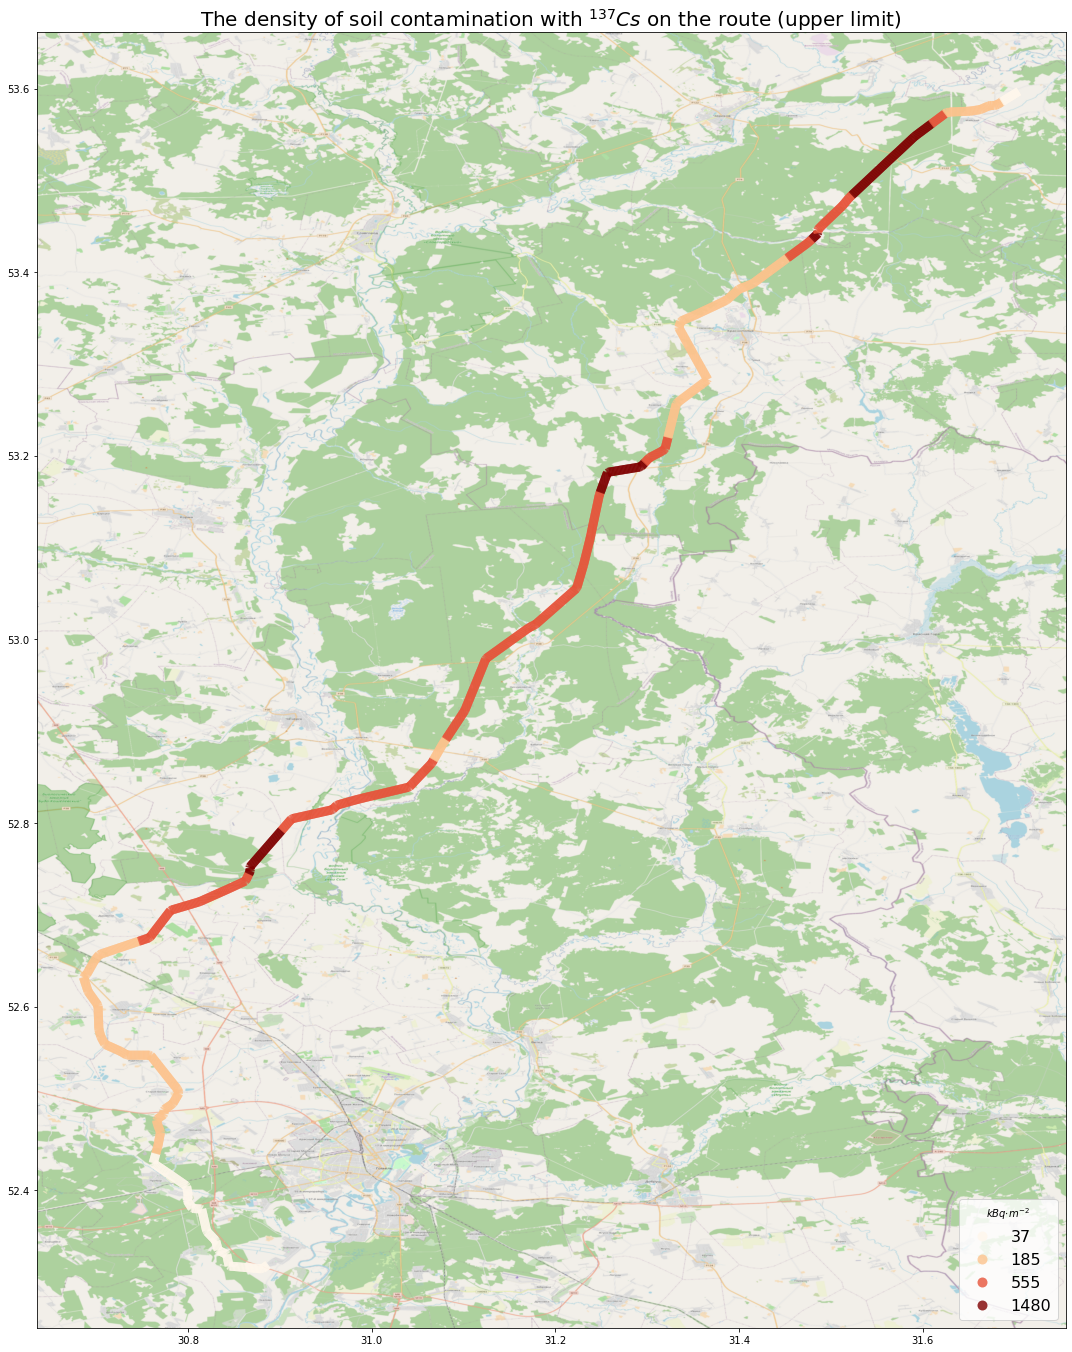

In [7]:
ax = data.plot(column='Density_Cs_max', alpha=0.8, figsize=(15,21), 
               legend=True, linewidth=9, cmap='OrRd', 
               legend_kwds={'loc': 'lower right', 'fontsize': 16, 'title': '$kBq{\cdot}m^{-2}$'}, categorical=True)
ax.set_title('The density of soil contamination with $^{137}Cs$ on the route (upper limit)', fontsize=20)
ctx.add_basemap(ax, crs=data.crs, zoom=12, url=ctx.sources.OSM_A)
plt.tight_layout()

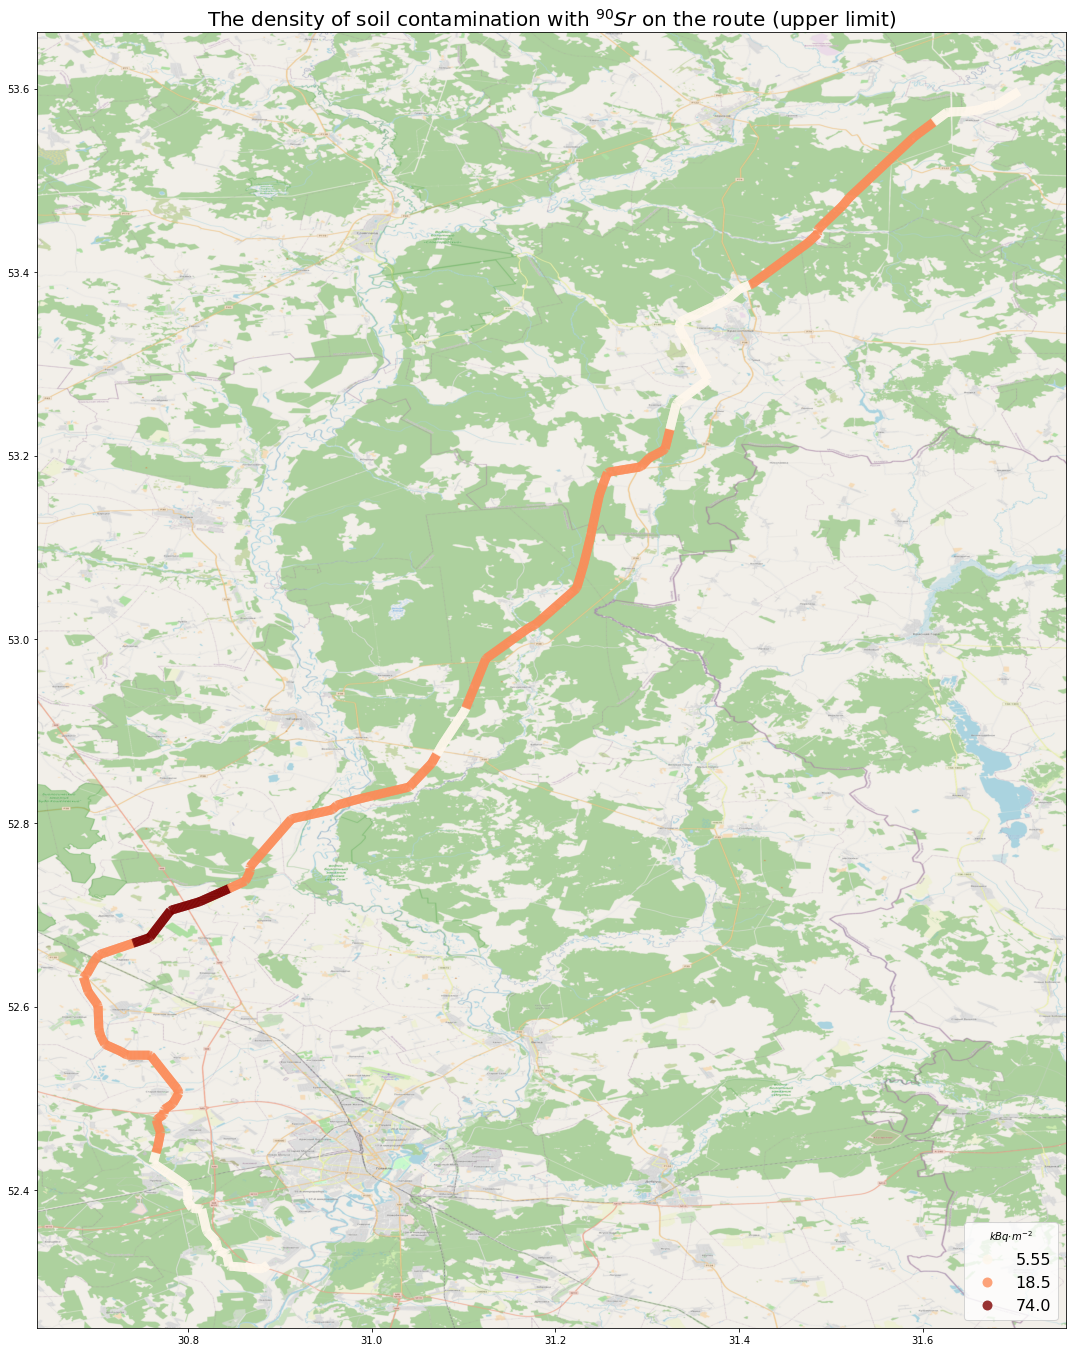

In [8]:
ax = data.plot(column='Density_Sr_max', alpha=0.8, figsize=(15,21), 
               legend=True, linewidth=9, cmap='OrRd', 
               legend_kwds={'loc': 'lower right', 'fontsize': 16, 'title': '$kBq{\cdot}m^{-2}$'}, categorical=True)
ax.set_title('The density of soil contamination with $^{90}Sr$ on the route (upper limit)', fontsize=20)
ctx.add_basemap(ax, crs=data.crs, zoom=12, url=ctx.sources.OSM_A)
plt.tight_layout()

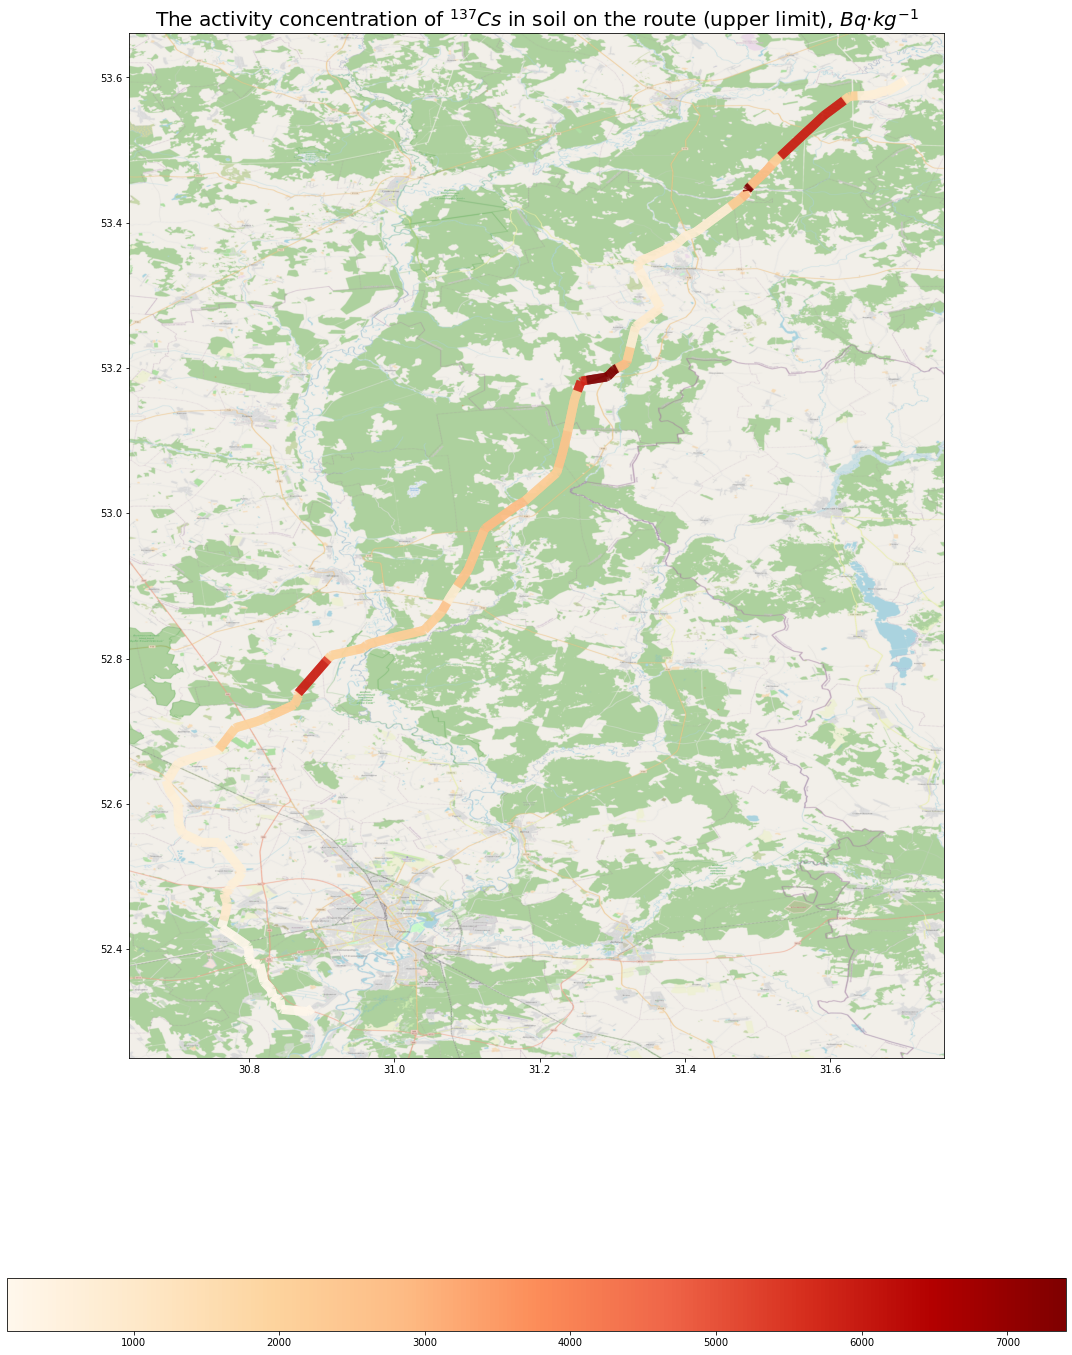

In [9]:
ax = data.plot(column='SA_Cs-137', alpha=0.8, figsize=(15,21), 
               legend=True, linewidth=9, cmap='OrRd', 
               legend_kwds={'orientation': "horizontal"})
ax.set_title('The activity concentration of $^{137}Cs$ in soil on the route (upper limit), $Bq{\cdot}kg^{-1}$', fontsize=20)
ctx.add_basemap(ax, crs=data.crs, zoom=12, url=ctx.sources.OSM_A)
plt.tight_layout()

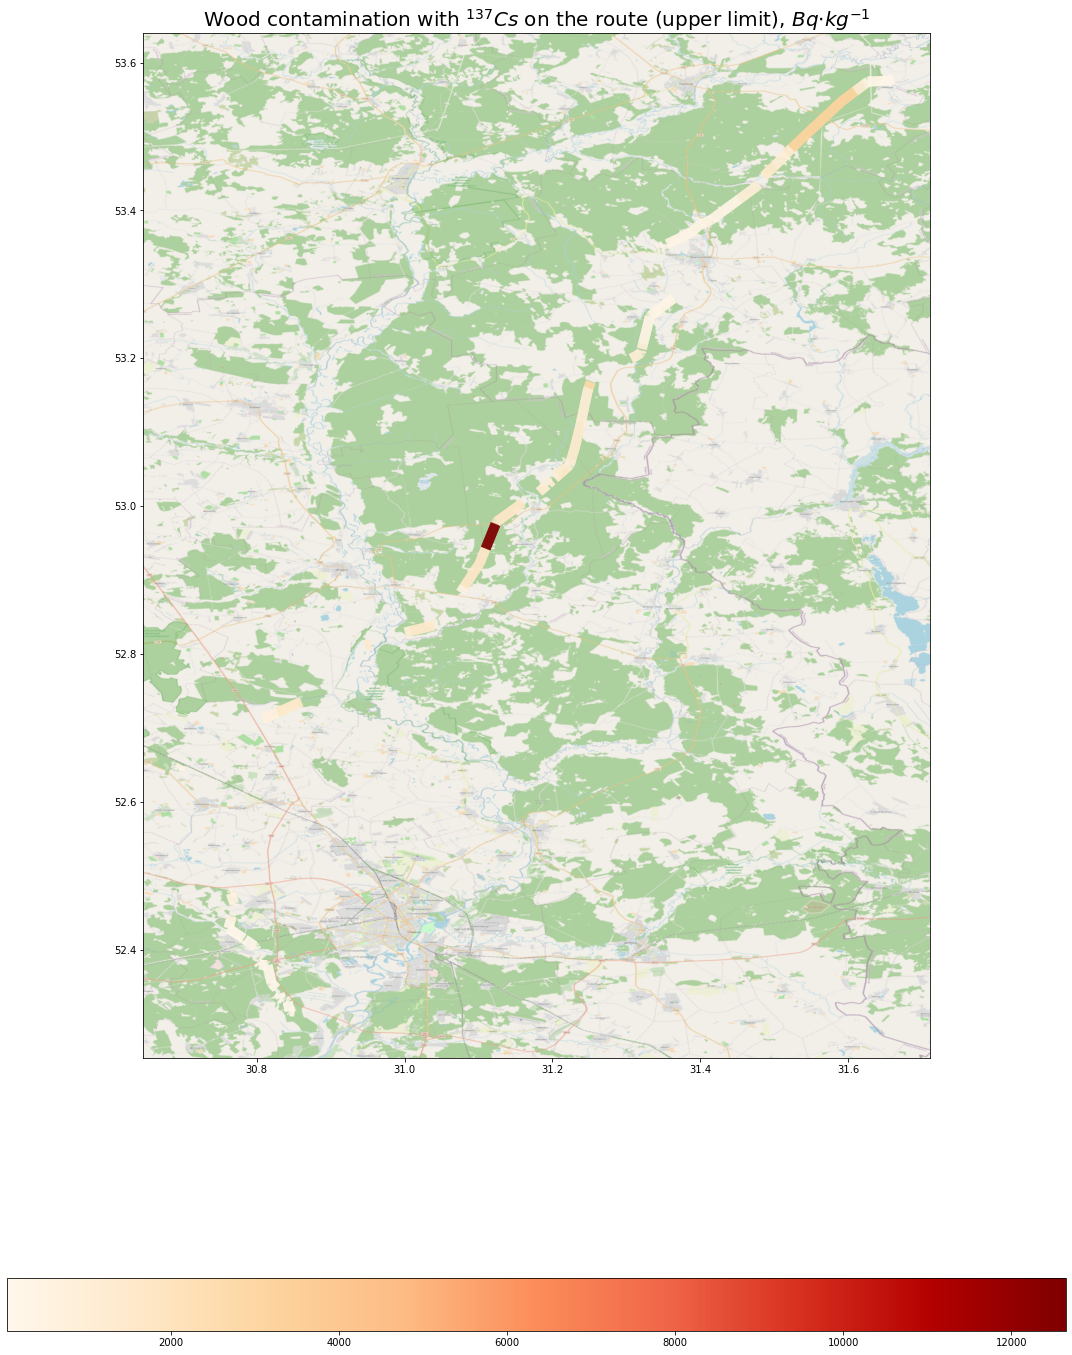

In [10]:
ax = data[~data['SA_Cs_Wood'].isna()].plot(column='SA_Cs_Wood', 
                                           alpha=0.8, figsize=(15,21), legend=True, linewidth=10, 
                                           cmap='OrRd', legend_kwds={'orientation': "horizontal"})
ax.set_title('Wood contamination with $^{137}Cs$ on the route (upper limit), $Bq{\cdot}kg^{-1}$', fontsize=20)
ctx.add_basemap(ax, crs=data.crs, zoom=12, url=ctx.sources.OSM_A)
plt.tight_layout()

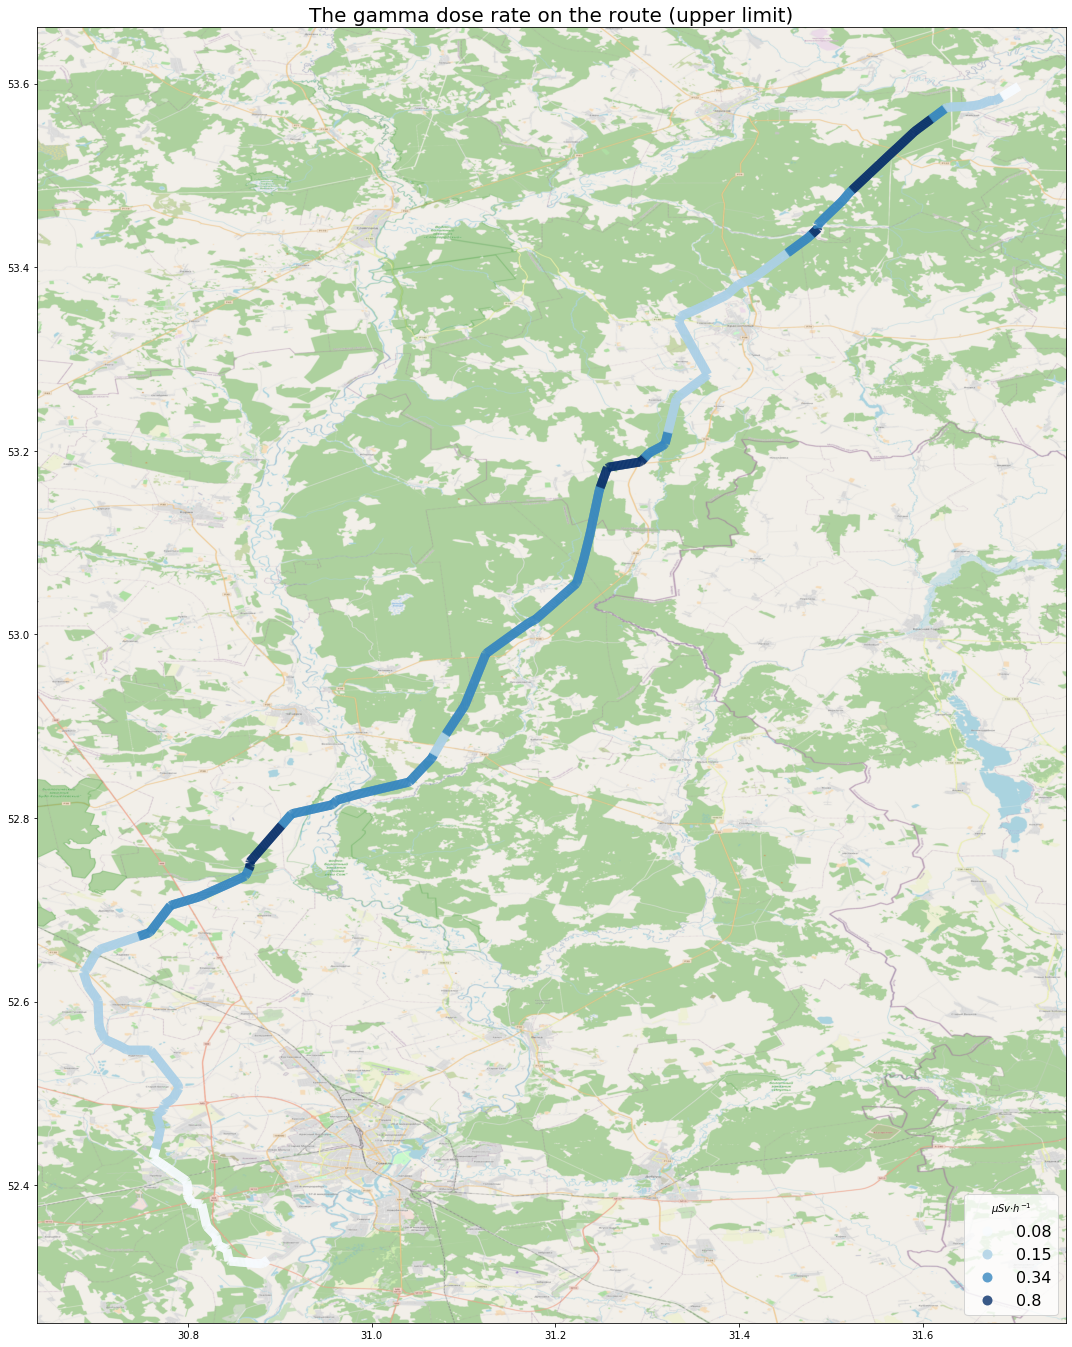

In [11]:
ax = data.plot(column='Dose_external', alpha=0.8, figsize=(15,21), 
               legend=True, linewidth=9, cmap='Blues', 
               legend_kwds={'loc': 'lower right', 'fontsize': 16, 'title': '${\mu}Sv{\cdot}h^{-1}$'}, 
               categorical=True)
ax.set_title('The gamma dose rate on the route (upper limit)', fontsize=20)
ctx.add_basemap(ax, crs=data.crs, zoom=12, url=ctx.sources.OSM_A)
plt.tight_layout()

In [16]:
data.groupby('Density_Cs_max').count()['geometry']*0.1

Density_Cs_max
37      21.2
185     65.2
555     73.3
1480    22.5
Name: geometry, dtype: float64

Length of route on the territory with contamination level 555-1480 $kBq{\cdot}m^{2}$ is 22.5 km.